# データの読み込み

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('housing.csv')
df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


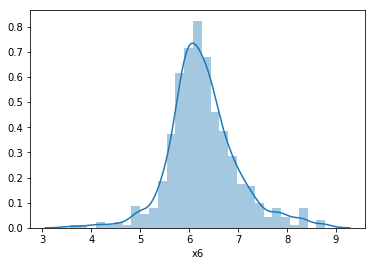

In [5]:
sns.distplot(df['x6'])

# 外れ値除去（３σ法）

In [6]:
col = 'x6' 

In [7]:
mean = df.mean()
mean

x1       3.613524
x2      11.363636
x3      11.136779
x4       0.069170
x5       0.554695
x6       6.284634
x7      68.574901
x8       3.795043
x9       9.549407
x10    408.237154
x11     18.455534
x12    356.674032
x13     12.653063
y       22.532806
dtype: float64

In [8]:
mean[col]

6.284634387351788

In [9]:
# 標準偏差（standard deviation）
sigma = df.std()
sigma

x1       8.601545
x2      23.322453
x3       6.860353
x4       0.253994
x5       0.115878
x6       0.702617
x7      28.148861
x8       2.105710
x9       8.707259
x10    168.537116
x11      2.164946
x12     91.294864
x13      7.141062
y        9.197104
dtype: float64

In [10]:
sigma[col]

0.7026171434153234

In [12]:
low = mean[col] - 3 * sigma[col]
low

4.176782957105817

In [14]:
high = mean[col] + 3 * sigma[col]
high

8.392485817597759

In [17]:
df2 = df[(df[col]>low) & (df[col]<high)]

In [18]:
len(df)

506

In [19]:
len(df2)

498

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


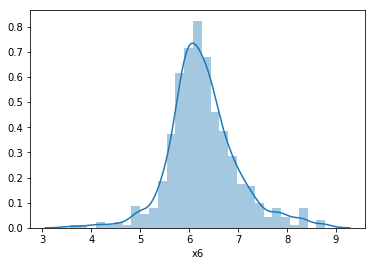

In [20]:
# 分布の確認
sns.distplot(df[col])

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


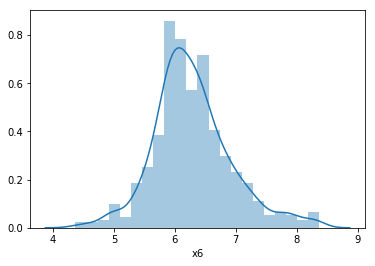

In [21]:
sns.distplot(df2[col])

In [23]:
cols = df.columns
cols

Index(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11',
       'x12', 'x13', 'y'],
      dtype='object')

In [25]:
_df = df
for col in cols:
    # 3σ法の上下限値を設定
    low = mean[col] - 3 * sigma[col]
    high = mean[col] + 3 * sigma[col]
    # 条件での絞り込み
    _df = _df[(_df[col]>low) & (_df[col]<high)]

In [26]:
len(df)

506

In [27]:
# 3σ法適用後
len(_df)

415

対処法

- 外れ値は取り除く
- 外れ値を平均もしくは中央値などで埋める
- 主成分分析等を使って、潜在変数に変換した後に3σ法を適用　←　高度

# 入力変数と出力変数に分割

In [28]:
_df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [30]:
X = _df.iloc[:,:-1]
y = _df.iloc[:,-1]

# 訓練データと検証データに分割

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=1)

# 重回帰分析

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
# モデルの宣言
model = LinearRegression()

In [40]:
# モデルの学習
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [39]:
# 検証 ← 訓練データ
model.score(X_train,y_train)

0.7972109224535134

In [38]:
# 検証 ← 検証データ
model.score(X_test,y_test)

0.6253776004329585

In [41]:
# 過学習（オーバーフィッティング）

# スケーリング

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
# scalerの宣言
scaler = StandardScaler()

In [45]:
# scalerの学習 ← 平均と標準偏差を計算
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [47]:
# scaling
X_train2 = scaler.transform(X_train)
X_test2 = scaler.transform(X_test)

In [50]:
X_train2

array([[-0.44982613, -0.47117023, -0.01455847, ...,  0.3716043 ,
         0.06655172, -0.73371428],
       [-0.45396528, -0.47117023, -0.7386746 , ...,  0.3716043 ,
         0.38053452, -0.32783019],
       [-0.19959841, -0.47117023,  1.29482264, ..., -1.75496677,
        -0.18177662, -0.75722108],
       ...,
       [ 0.49446336, -0.47117023,  1.07385525, ...,  0.84417564,
         0.27992872, -0.12097034],
       [-0.45659855,  0.61013288, -0.5893723 , ...,  0.08806149,
         0.44754069, -0.88259069],
       [-0.47327932, -0.47117023, -0.7386746 , ...,  0.3716043 ,
         0.44754069, -0.54095851]])

In [51]:
# モデルの宣言
model = LinearRegression()

In [52]:
# モデルの学習
model.fit(X_train2,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [53]:
# 検証 ← 訓練データ
model.score(X_train2,y_train)

0.7972109224535133

In [54]:
model.score(X_test2,y_test)

0.6253776004329594

In [55]:
np.set_printoptions(precision=2,suppress=True)

In [58]:
# 重みの確認
model.coef_

array([-0.2 ,  0.21,  0.51,  0.  , -1.21,  3.92, -0.37, -1.86,  1.17,
       -1.53, -1.87,  0.24, -2.76])

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


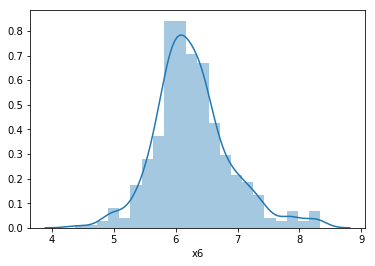

In [59]:
sns.distplot(_df['x6'])

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


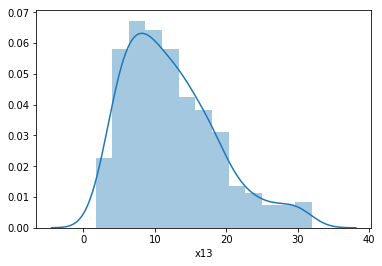

In [60]:
sns.distplot(_df['x13'])